# Title

# Load and take a look at the data

In [85]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [86]:
# Load data
ds=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [87]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [88]:
ds.shape

(1470, 35)

In [89]:
ds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Check and treat null values

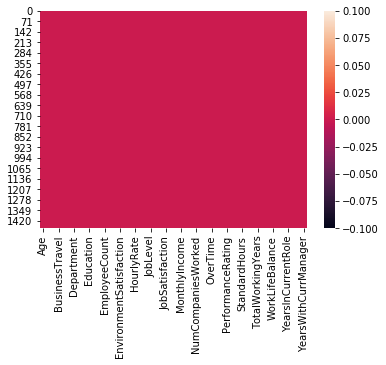

In [90]:
sns.heatmap(ds.isnull())

No null values

In [91]:
ds.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Check correlation

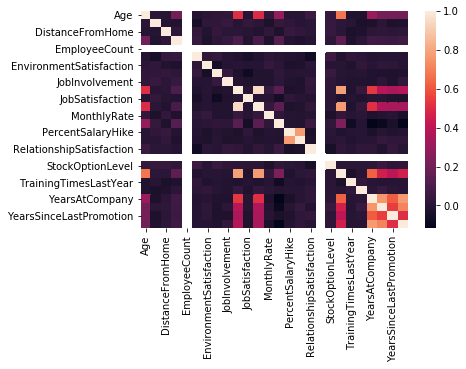

In [92]:
dscor=ds.corr()
sns.heatmap(dscor)

Representation seems off, difficult to tell which feature is which.

# Summary statistics

In [93]:
ds.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Standard deviations look normal.

# Data visualizations

In [94]:
ds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [95]:
# Show the amount of employees retained vs lost
ds.groupby('Attrition')['Attrition'].count()

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

Far more employees are staying with the company than are leaving. High turnover is negative. We will try to make suggestions on how to retain staff.

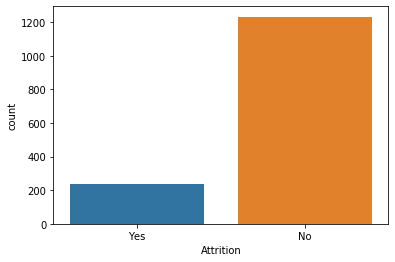

In [96]:
# show the amount of employees retained vs not
sns.countplot(ds['Attrition'])

The company retains far more employees than they lose.

In [97]:
# Show the amount of employees per department
ds.groupby(['Department'])['Department'].count()

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64

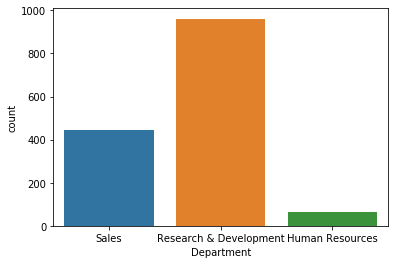

In [98]:
# Show amount of employees per department
sns.countplot(ds['Department'])

Research is by far the largest department, followed by sales and finally HR is the smallest department.

In [99]:
# Show the sizes of departments in percentages
all_department_percentage = ds['Department'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
all_department_percentage

Research & Development    65.4%
Sales                     30.3%
Human Resources            4.3%
Name: Department, dtype: object

In [100]:
# Show the amount of employees retained (No) vs lost (Yes) per department
ds.groupby(['Attrition','Department'])['Department'].count()

Attrition  Department            
No         Human Resources            51
           Research & Development    828
           Sales                     354
Yes        Human Resources            12
           Research & Development    133
           Sales                      92
Name: Department, dtype: int64

In [101]:
grouped_ds = ds.groupby('Attrition')

means = grouped_ds.mean()
means

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Judging by the above means for employees retained and lost the employees that were lost were worse off in all aspects except the time of their last job promotion. This suggests that being promoted is not the most important factor to employees. Also, older employees are more likely to stay. 

In [102]:
grouped_ds = ds.groupby('Attrition')

max = grouped_ds.max()
max

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,60,Travel_Rarely,1499,Sales,29,5,Technical Degree,1,2068,4,...,4,80,3,38,6,4,37,18,15,17
Yes,58,Travel_Rarely,1496,Sales,29,5,Technical Degree,1,2055,4,...,4,80,3,40,6,4,40,15,15,14


From the above we can gather that some employees retire early as they are unlikely to leave to a new company so late in their careerss and all the other variables are very similar. The company can look into incentives for employees to stay until retirement age.

In [103]:
grouped_ds = ds.groupby('Attrition')

min = grouped_ds.min()
min

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,18,Non-Travel,102,Human Resources,1,1,Human Resources,1,2,1,...,1,80,0,0,0,1,0,0,0,0
Yes,18,Non-Travel,103,Human Resources,1,1,Human Resources,1,1,1,...,1,80,0,0,0,1,0,0,0,0


From the above we can gather that some young employees with low education levels will leave their positions due to personal preferences as all of their scores are identcal. Ideally employees with these scores should have a less significant weigting in the considerations as it is not necessarily within the company's control and these employees are more easily replaced. Alternatively they can spend more time during reruitment to ensure a better fit for the company which would help them retain more employees.

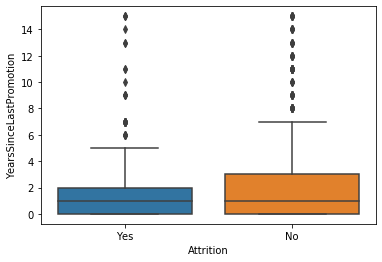

In [104]:
sns.boxplot(x='Attrition',y='YearsSinceLastPromotion',data=ds)

Years since last promotion does not seem to be a motivating factor to retain employees.

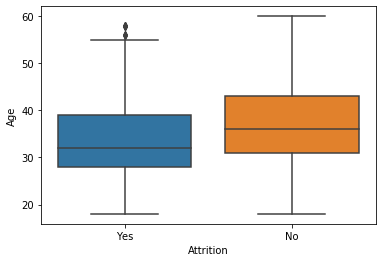

In [105]:
sns.boxplot(x='Attrition',y='Age',data=ds)

Older employees are less likely to resign.

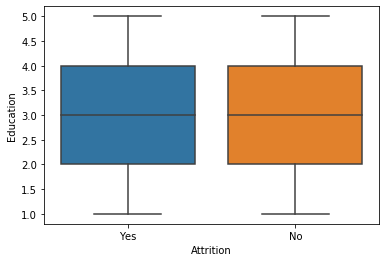

In [106]:
sns.boxplot(x='Attrition',y='Education',data=ds)

Education does not seem to be a deciding factor in attrition.

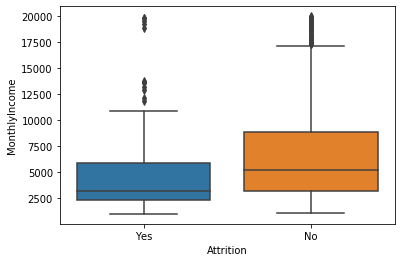

In [107]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=ds)

Employees with a lower monthly income are far more likely to leave the company. It is an important factor in attrition.

In [108]:
ds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

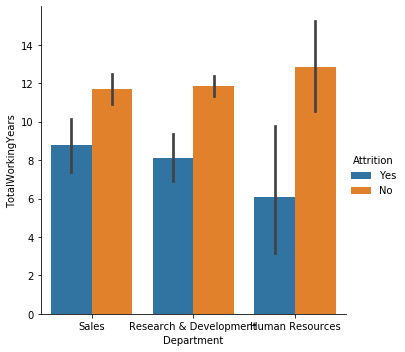

In [109]:
# Show the average working years for employees by department for attrition
sns.catplot(x='Department', y= 'TotalWorkingYears', hue='Attrition', data=ds, kind='bar')

Employees who have been with the company for a shorter period of time are more likely to resign, especially in the HR department. Employees in the Sales department are more likely to resign after many years at the company than any other department.

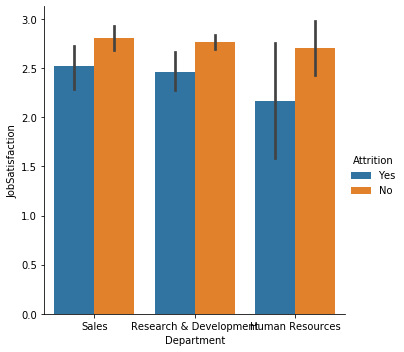

In [110]:
sns.catplot(x='Department', y= 'JobSatisfaction', hue='Attrition', data=ds, kind='bar')

Employees with lower job satisfaction levels are more likely to resign. Especially in HR. HR seemsto be the department with the lowest levels of job satisfaction overall. They can look at team building activities for HR. It seems natural though because the other employees will be more attached to their specific field of knowledge.

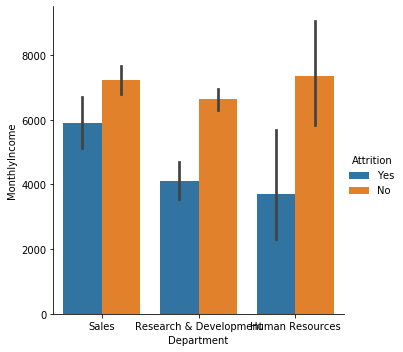

In [111]:
sns.catplot(x='Department', y= 'MonthlyIncome', hue='Attrition', data=ds, kind='bar')

Employees with a lower monthly income are far more likely to resign. In sales it seems to matter less.

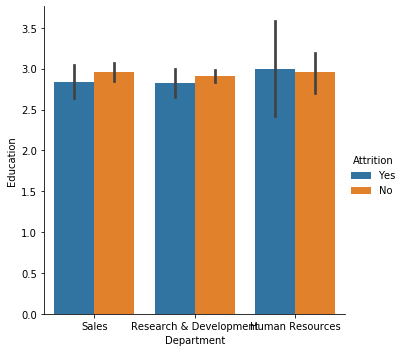

In [112]:
sns.catplot(x='Department', y= 'Education', hue='Attrition', data=ds, kind='bar')

Education does not seem to contribute greatly to attrition. The HR department are most likely to suffer losses of well educated employees.

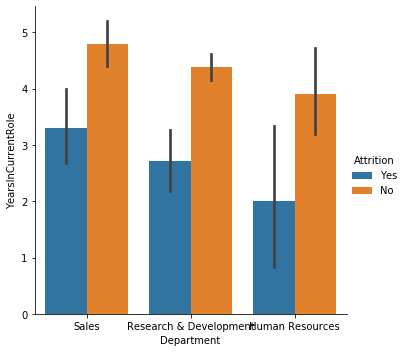

In [113]:
sns.catplot(x='Department', y= 'YearsInCurrentRole', hue='Attrition', data=ds, kind='bar')

Employees are more likely to resign if they have been in a role for a shorter period of time.

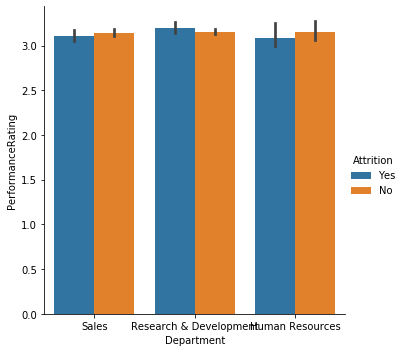

In [114]:
sns.catplot(x='Department', y= 'PerformanceRating', hue='Attrition', data=ds, kind='bar')

An employee's performance rating does not seem to make them more likely to resign.

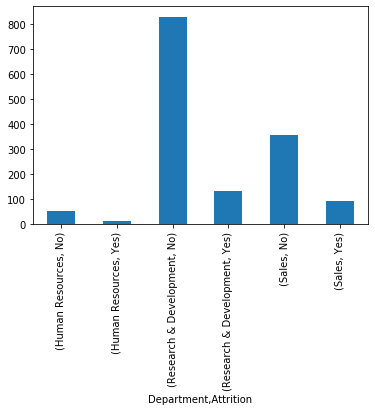

In [115]:
# Show Attrition (yes and no) by department
ds.groupby('Department')['Attrition'].value_counts().head(51).plot.bar()

This table only displays the frist student on the list with the highest score per subject.  however, there could be multiple students who all have the same top score. This table is therefore incomplete.

# Check eveness of dataset

In [116]:
year_counts = ds['Attrition'].value_counts()
year_counts

No     1233
Yes     237
Name: Attrition, dtype: int64

In [117]:
year_percentage = ds['Attrition'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
year_percentage

No     83.9%
Yes    16.1%
Name: Attrition, dtype: object

In [118]:
all_department_percentage = ds['Department'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
all_department_percentage

Research & Development    65.4%
Sales                     30.3%
Human Resources            4.3%
Name: Department, dtype: object

The data is not distributed evenly over departments or attrition which will affect the accuracy of the accuracy scores.

# Encode categorical columns to numeric values

In [119]:
eds=ds

In [120]:
eds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [121]:
eds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [122]:
# Encode one or specific columns in a dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Attrition', 'BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole','MaritalStatus','Over18', 'OverTime'] 
for col in cols:
    eds[col] = le.fit_transform(eds[col])

In [123]:
eds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


# Check correlation after encoding

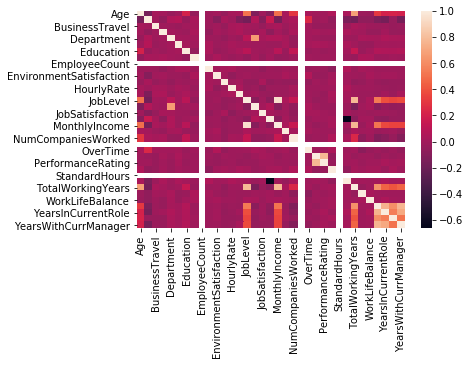

In [124]:
edscor=eds.corr()
sns.heatmap(edscor)

# Drop irrelevant columns

In [125]:
eds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [126]:
ds['StandardHours'].unique()

array([80], dtype=int64)

In [127]:
ds['OverTime'].unique()

array([1, 0])

In [128]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=eds.drop(columns=['BusinessTravel', 'DailyRate','DistanceFromHome', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Gender', 'HourlyRate', 'JobRole','MaritalStatus', 'MonthlyRate', 'OverTime', 
        'PercentSalaryHike', 'PerformanceRating','StandardHours', 'StockOptionLevel'])

In [129]:
nds.head()

,Age,Attrition,Department,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,Over18,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,2,3,2,4,5993,8,0,1,8,0,1,6,4,0,5
1,49,0,1,1,3,2,2,2,5130,1,0,4,10,3,3,10,7,1,7
2,37,1,1,2,4,2,1,3,2090,6,0,2,7,3,3,0,0,0,0
3,33,0,1,4,4,3,1,3,2909,1,0,3,8,3,3,8,7,3,0
4,27,0,1,1,1,3,1,2,3468,9,0,4,6,3,3,2,2,2,2


# Find and remove outliers

In [130]:
nds.shape

(1470, 19)

In [131]:
nds.columns

Index(['Age', 'Attrition', 'Department', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

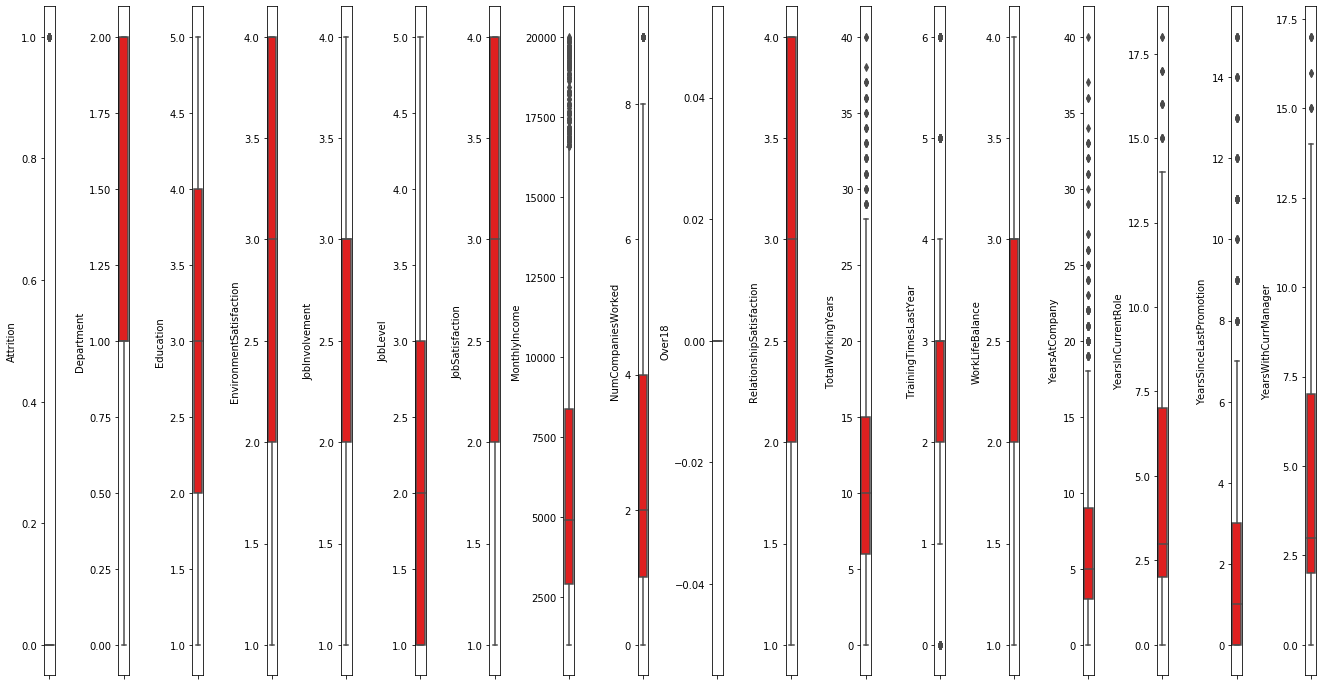

In [132]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=19
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

When I tried to remove the outliers with the zscore it removed all columns, so I skipped this step. 

# Check and adjust skewness

In [133]:
nds.skew()

Age                         0.413286
Attrition                   1.844366
Department                  0.172231
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
NumCompaniesWorked          1.026471
Over18                      0.000000
RelationshipSatisfaction   -0.302828
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

# Split data into x and y

In [134]:
nds.columns

Index(['Age', 'Attrition', 'Department', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [135]:
# Lineup target and input values
nds_x=nds.drop(columns=['Attrition'])
y=nds[['Attrition']]

No scaler was applied because it brought down the model scores.

# Train-Test split

In [136]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(nds_x,y, random_state=55, test_size=0.20)

# Classification models

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [138]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [139]:
# Randomforrest Classifier
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8775510204081632
[[255   5]
 [ 31   3]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       260
           1       0.38      0.09      0.14        34

    accuracy                           0.88       294
   macro avg       0.63      0.53      0.54       294
weighted avg       0.83      0.88      0.84       294



In [140]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8877551020408163
[[251   9]
 [ 24  10]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       260
           1       0.53      0.29      0.38        34

    accuracy                           0.89       294
   macro avg       0.72      0.63      0.66       294
weighted avg       0.87      0.89      0.87       294



# Using GridSearchCV to select the best parameter

In [141]:
# best parameters for logistic regression

from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [142]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'gini'}

In [143]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,9)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 9}

Logistic Regression and binary classification methods

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [145]:
from sklearn.model_selection import cross_val_score

In [146]:
KNN=KNeighborsClassifier(n_neighbors= 9)
LR=LogisticRegression(penalty= 'l2')
DT=DecisionTreeClassifier(criterion='gini')# check random_state?
GNB=GaussianNB()

In [147]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')



Accuracy score = 0.8707482993197279


cross validation score = 0.826530612244898


roc_auc_score =  0.5178733031674208


classification_report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       260
           1       0.25      0.06      0.10        34

    accuracy                           0.87       294
   macro avg       0.57      0.52      0.51       294
weighted avg       0.81      0.87      0.83       294



[[254   6]
 [ 32   2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* LogisticRegression *************************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_

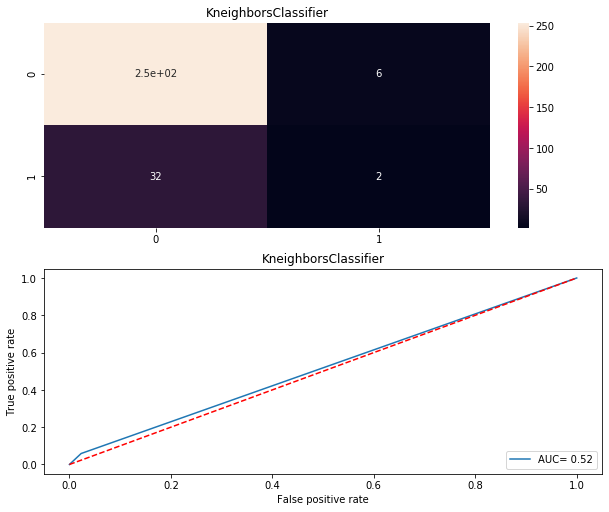

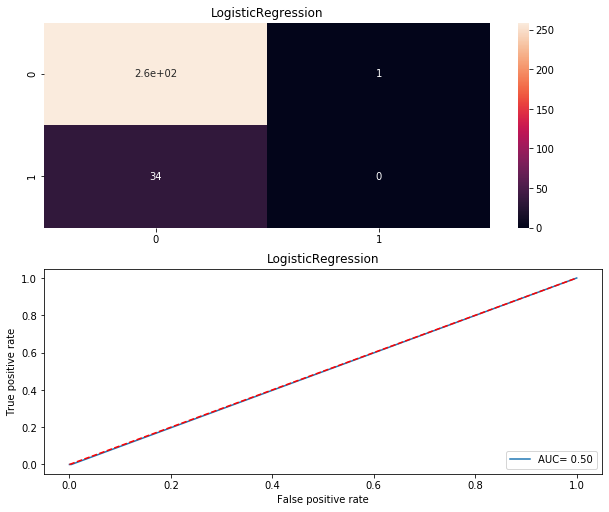

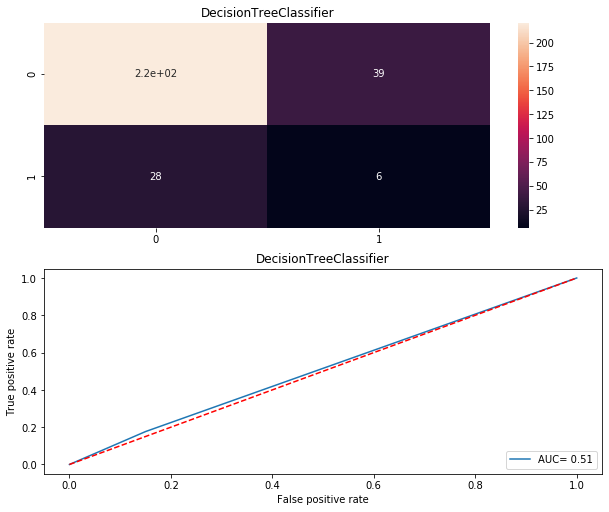

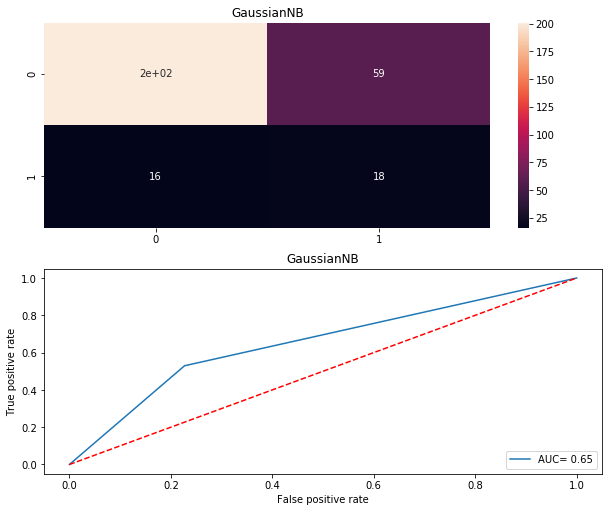

In [148]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,nds_x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')
    


In [149]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KneighborsClassifier,87.074830,82.653061,51.787330
1,LogisticRegression,88.095238,83.809524,49.807692
2,DecisionTreeClassifier,77.210884,75.442177,51.323529
3,GaussianNB,74.489796,73.877551,65.124434


I choose the AdaboostClassifier model as my final model because it gives the best scores.

Accuracy_score = 88.7

precision = 91.0

recall = 97.0

# Save the model

In [151]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(ad,'Attrition.pkl')

['Attrition.pkl']

In [152]:
# Load and use model to make a prediction
model=joblib.load('Attrition.pkl')
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])